<h3> Paso 1. Cargar las librerias de trabajo y datos<h3>


<p>Primero importamos las librerias que necesitamos 'pandas' para manejar datos y 'sckikit-learn' para modelo y metricas <p>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Acción requerida 
nombre_archivo = "data_base.xlsx"

try:
    df = pd.read_excel(nombre_archivo)
    print("Archivo cargado exitosamente.")
    print("primeras 5 filas")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo}' no se encontró.")



Archivo cargado exitosamente.
primeras 5 filas


,NRC,Periodo,Asignatura,Momento,Salon,Tipo,Id_Docente,Responsable,Sede_Docente,Ubicación,Tipo_Curso,Total_Alistamiento,Total_Ejecucion,Total_Curso,Valoracion
0,41-100,202441,Metodología de la Investigac,3,B1-104,2,478259,AEMD,IBA,IBA,PD,50.0,0.0,50.0,Desempeño insatisfactorio
1,41-101,202441,Formulación de Proyectos,1,B1-104,2,662326,ESP,IBA,IBA,PD,30.0,16.1,46.1,Desempeño insatisfactorio
2,41-102,202441,Evaluación de Proyectos,2,B2-105,2,662326,ESP,IBA,IBA,PD,20.0,30.0,50.0,Desempeño insatisfactorio
3,41-104,202441,Gerencia del Conoc y la Tecnol,2,VIRTU,1,846904,ESP,IBA,IBA,PD,50.0,35.0,85.0,Desempeño Bueno
4,41-56330,202441,Electiva,2,B1-104,2,738598,ESP,IBA,IBA,PD,50.0,40.0,90.0,Desempeño Bueno


<h3>Paso 2. Definir la Variable Y <h3>

variable objetivo 'y' definida como 'Valoracion'
Distribucion de categorias
Valoracion
Desempeño Bueno              899
Desempeño Excelente          210
No evaluada                   98
Desempeño Aceptable           30
Desempeño insatisfactorio     29
Name: count, dtype: int64


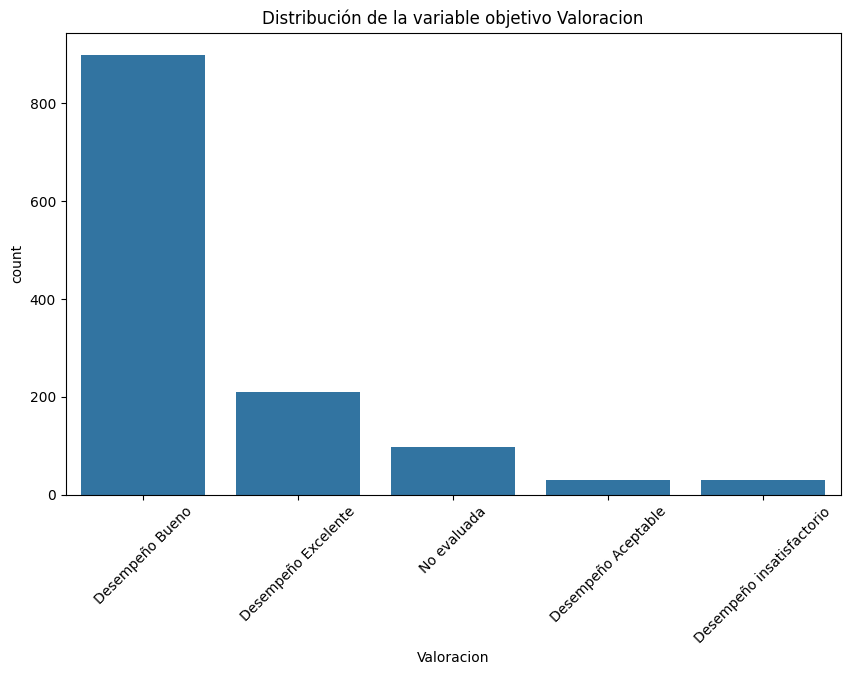

In [5]:
#La columna 'Valoracion' es la variable objetivo 'y'
y = df['Valoracion']
print("variable objetivo 'y' definida como 'Valoracion'")
print("Distribucion de categorias")
print(y.value_counts())

#Visualizacion de la distribucion 
plt.figure(figsize=(10, 6))
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Distribución de la variable objetivo Valoracion')
plt.xticks(rotation=45) #Rotamos las etiquetas si es necesario
plt.show()

<h3>Paso 3: Seleccionar y preparas las caracteristicas (X) <h3>


In [6]:
#Seleccionamos las caracteristicas (X)
columnas_numericas = ['Total_Alistamiento', 'Total_Ejecucion']
columnas_categoricas = ['Momento', 'Sede_Docente', 'Tipo_Curso']

#Creamos el dataframe de caracteristicas X
X_Numericas = df[columnas_numericas]
X_Categoricas = df[columnas_categoricas]

#Aplicamos el One-HOT Encoding a las variables categoricas
#Esto crea nuevas columnas binarias para cada categoria (ej. 'sede_Norte','Sede_Sur')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)  
X_Categoricas_Encoded = pd.DataFrame(encoder.fit_transform(X_Categoricas),columns=encoder.get_feature_names_out(columnas_categoricas))

#Combinamos las caracteristicas numericas y las categoricas codificadas
X = pd.concat([X_Numericas.reset_index(drop=True), X_Categoricas_Encoded.reset_index(drop=True)], axis=1)

print("Caracteristicas (X) preparadas. Dimensiones de X:", X.shape)
print("Primeras 5 filas de X:")
display(X.head())




Caracteristicas (X) preparadas. Dimensiones de X: (1266, 13)
Primeras 5 filas de X:


,Total_Alistamiento,Total_Ejecucion,Momento_1,Momento_2,Momento_3,Momento_4,Sede_Docente_IBA,Sede_Docente_LA DORADA,Sede_Docente_LERIDA,Sede_Docente_No Encontrada,Sede_Docente_PUERTO BOYACA,Tipo_Curso_PD,Tipo_Curso_PP
0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,30.0,16.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50.0,35.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,40.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<h3>Paso 4. Estandarizacion de Datos <h3>

K-NN se basa en distancias, por lo que es **fundamental** que todas las caracteristicas estes en la misma escala. Se usa **StandarScaler** para que todas las columnas tengan una media 0 y una desviacion estandar de 1.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos estandarizados. El resultado es un array numpy.")

Datos estandarizados. El resultado es un array numpy.


<h3> Paso 5. Division de Datos en Entrenamiento y prueba <h3>


Dividimos nuestro conjunto de datos en dos partes: <br>
**80% para entrenamiento:** El modelo "aprendera de estos datos <br>
**20% para prueba:** Usaremos estos datos para evaluar el rendimiento del modelo en casos que no ha visto antes

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Datos de entrenamiento entrenamiento: {X_train.shape[0]} filas.")
print(f"Datos de prueba: {X_test.shape[0]} filas.")


Datos de entrenamiento entrenamiento: 1012 filas.
Datos de prueba: 254 filas.


<h3>Paso 6. Entrenamiento y evaluacion del modelo K-NN <h3>

Ahora creamos el clasificador K-NN.

La exactitud (acurracy) del modelo K-NN con k=5: 0.96

Reporte de Clasificacion:
                           precision    recall  f1-score   support

      Desempeño Aceptable       0.67      0.67      0.67         6
          Desempeño Bueno       0.96      1.00      0.98       180
      Desempeño Excelente       1.00      0.95      0.98        42
Desempeño insatisfactorio       1.00      0.67      0.80         6
              No evaluada       1.00      0.85      0.92        20

                 accuracy                           0.96       254
                macro avg       0.93      0.83      0.87       254
             weighted avg       0.97      0.96      0.96       254


Matriz de Confusion:


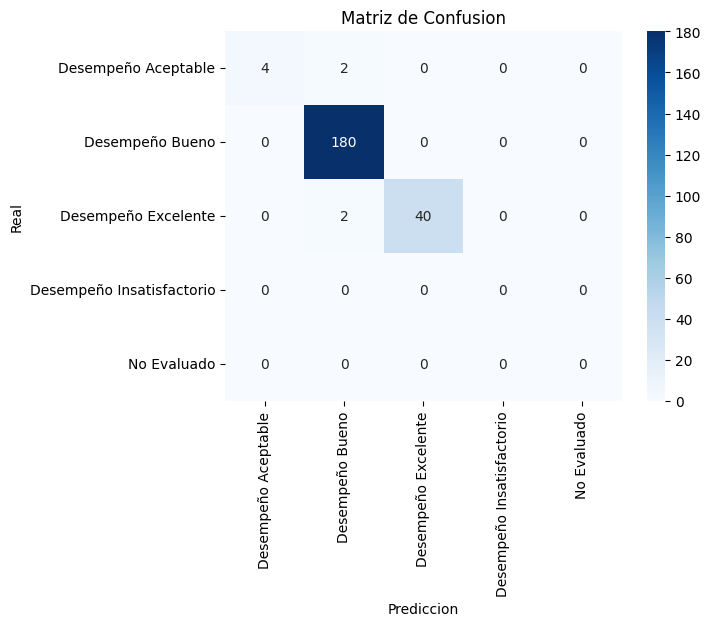

In [16]:
k = 5
km = KNeighborsClassifier(n_neighbors=k)

#Entrenamos al modelo con los datos de entrenamiento
km.fit(X_train, y_train)

#Hcemos predicciones con los datos de prueba
y_pred = km.predict(X_test)

#Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La exactitud (acurracy) del modelo K-NN con k={k}: {accuracy:.2f}")

print("\nReporte de Clasificacion:")
print(classification_report(y_test, y_pred))

#Matriz de confusion
print("\nMatriz de Confusion:")
cm = confusion_matrix(y_test, y_pred, labels=['Desempeño Aceptable', 'Desempeño Bueno', 'Desempeño Excelente', 'Desempeño Insatisfactorio', 'No Evaluado'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Desempeño Aceptable', 'Desempeño Bueno', 'Desempeño Excelente', 'Desempeño Insatisfactorio', 'No Evaluado'], yticklabels=['Desempeño Aceptable', 'Desempeño Bueno', 'Desempeño Excelente', 'Desempeño Insatisfactorio', 'No Evaluado'])
plt.ylabel('Real')
plt.xlabel('Prediccion')
plt.title('Matriz de Confusion')
plt.show()

<h3> 7. Optimizacion para encontrar mejor valor para k <h3>

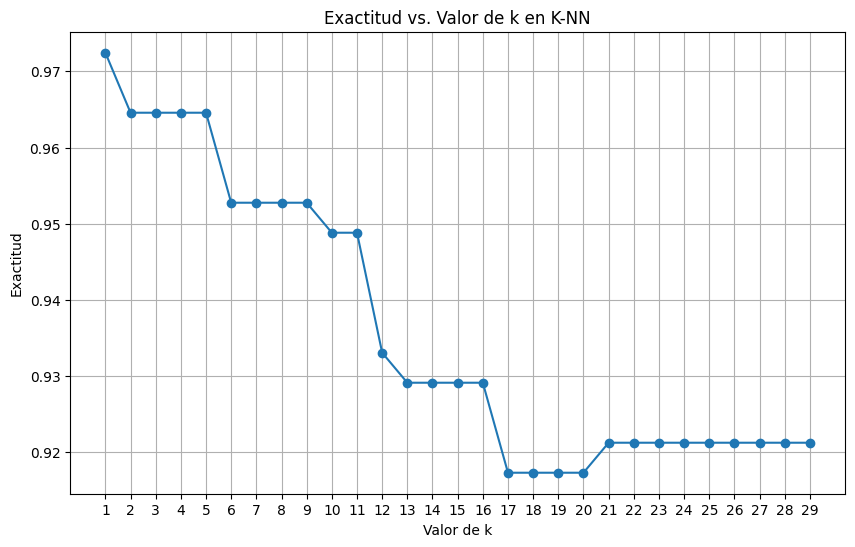

In [17]:
# Optimizacion para encontrar mejor valor para k
accuracies = []
k_values = range(1, 30)
for k in k_values:
    km = KNeighborsClassifier(n_neighbors=k)
    km.fit(X_train, y_train)
    y_pred = km.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Exactitud vs. Valor de k en K-NN')
plt.xlabel('Valor de k')
plt.ylabel('Exactitud')
plt.xticks(k_values)
plt.grid()
plt.show()
